# JUST Capital - TDI Semi Final Proposal (Arun Bharadwaj)




# INTRODUCTION

### The proposed capstone project aims to identify the significance of the JUST score. The JUST score is a ranking methodology developed by JUST capital. The score tries to rank companies based on social issues that matter to the larger public. JUST capital`s methodology accounts for the following metrics: the way companies treat their employees, wage discrimination, workplace safety, workforce training, the way the companies suppliers treat their employees, whether the company does business with repressive governments, companies relationship with communities, job creation in the US, product quality, customer satisfiaction, product pricing policy, customer privacy, legal record, corporate governance and environmental impact.  

# DATASET


### JUST capital have provided data on the above metrics for anonymized companies. Their complete dataset contains 900 companies. For now, they have made public information about the top 50% of these companies. JUST capital have provided information on the stock price returns of 2571 anonymized companies, over 800 anonymized timeperiods. JUST capital have also provided information about the health and census data of the locations where these companies are located. Finally, some company specific information is also available.

# SUGGESTED QUESTIONS

### JUST capital have come up with a list of potential projects and questions. These include: finding the relationship between stock price returns, community health, income inequality and JUST scores. Some recommendations that can be given to companies for improving their JUST scores is also a question. 

# APPROACHING THE PROJECT

### The capstone project is divided into 4 mini-projects, similar to JUST Capital`s suggested questions. In every mini-project, the differences that occur due to the different industries are also taken into account. 

### All 4 mini-projects have following structure: data extraction, exploratory data analysis, feature engineering (if possible) and machine learning.  

## Below are some results from mini-project 1

# MINI-PROJECT 1 (JUST SCORE VERSUS STOCK RETURNS)

## DATA EXTRACTION

### Data to be extracted for this mini-project are the COMPANY_SCORES_TOP_HALF.xlsx, RETURNS_1.xlsx, RETURNS_2.xlsx. 

## PROBLEMS WITH DATA

### Biggest problem with RETURNS_1 and RETURNS_2.xlsx is the fact that time periods are anonymized. Standalone stock returns do not convey useful information since they do not tell us anything about the benchmark returns. Since time periods are anonymized, we cannot compare individual stock returns with benchmark returns. Instead, we will have to find the mean or median of all companies during the timeperiod and assume that this metric approximates benchmark return. 

# INTERACTIVE BOKEH VISUALIZATION

### An interactive bokeh scatter plot of all relevant features in COMPANY_SCORES_TOP_HALF.xlsx data was constructed. You can interact with it by scrolling down.

# EXPLORATORY DATA ANALYSIS 

### Three types of exploratory data analysis were conducted: histograms of all features in the COMPANY_SCORES_TOP_HALF.xlsx data were constructed, the correlation between some of the features and INVEST.RETURN (5-year total shareholder return) was developed and the number of companies ranked in top 100 as per JUST score was split based on industry type. 

### The histograms show that multiple columns like LEAD.TRUTH, CUST.DISC, SUPPLY.REPRESS and TREAT.LAYOFF have only a single class of observations. So, these features are removed from the analysis.

### The correlation exercise was done using the new dataset, which did not include the above columns. Also, the id, JUST_IND, JUST_100 columns were removed before the correlation exercise. The correlation exercise showed weak correlation between INVEST.RETURN and all other features in the dataset.

### The histogram shows that the number of companies in the top 100 of JUST score based on industry type are nearly equal across all industries. 

# MACHINE LEARNING 

### For the machine learning part of the mini project, the relationship between the probability of a company outperforming the market (alpha) and its JUST component scores was studied. The initial results show low degree of association between alpha and the JUST component scores. The logistic regression output shows that PAY.CEO, COMM.CHARITY, CUST.PRIV and ENV.EFFICIENT to be the significant dependant variables. Model accuracy improves when random forest algorithm is used. It improves even further when a gradient boosting classifier is used.

# MINI-PROJECT 2,3 and 4 will be completed if I get selected in the TDI cohort.

In [31]:
import pandas as pd
from bokeh.layouts import row, widgetbox
from bokeh.models import Select
from bokeh.plotting import curdoc, figure
from bokeh.io import output_notebook,push_notebook,show
from bokeh.application.handlers import FunctionHandler
from bokeh.application import Application

output_notebook()

Loading BokehJS ...

In [32]:
df = pd.read_excel('COMPANY_SCORES_TOP_HALF.xlsx')

del df['id']
del df['JUST_IND']
del df['JUST_100']

def modify_doc(doc):
    def create_figure():
     xs = df[x.value].values
     ys = df[y.value].values
     x_title = x.value.title()
     y_title = y.value.title()

     p = figure(plot_height=600, plot_width=800, tools='pan,box_zoom,reset')
     p.xaxis.axis_label = x_title
     p.yaxis.axis_label = y_title
     p.circle(x=xs, y=ys, line_color="white", alpha=1, hover_color='white', hover_alpha=0.5)
    
     return p
    
    def update(attr, old, new):
     layout.children[1] = create_figure()

    columns=['WGT_SCORE', 'PAY', 'TREAT', 'SUPPLY', 'COMM', 'JOBS', 'PROD',
         'CUST', 'LEAD', 'ENV', 'INVEST', 'PAY.LIVING', 'PAY.PTO',
         'PAY.HEALTH', 'PAY.FAIR', 'PAY.RETIRE', 'PAY.DISC', 'PAY.CEO',
         'TREAT.SAFE', 'TREAT.WLB', 'TREAT.EDU', 'TREAT.DISC',
         'TREAT.LAYOFF', 'TREAT.RESPECT', 'SUPPLY.ABUSE', 'SUPPLY.CONFLICT',
         'SUPPLY.REPRESS', 'COMM.RELS', 'COMM.CHARITY', 'JOBS.US',
         'PROD.BEN', 'PROD.QUAL', 'CUST.FAIR', 'CUST.RELS', 'CUST.DISC',
         'CUST.PRIV', 'LEAD.LAWS','LEAD.INTEGRITY', 'LEAD.TRUTH',
         'LEAD.TAX', 'LEAD.POLITICS', 'ENV.POLLUTION', 'ENV.MGMT',
         'ENV.EFFICIENT', 'INVEST.ACCURATE', 'INVEST.PROFIT',
         'INVEST.RETURN']

    x = Select(title='X-Axis', value='WGT_SCORE', options=columns)
    x.on_change('value', update)

    y = Select(title='Y-Axis', value='PAY', options=columns)
    y.on_change('value', update)

    p = create_figure()
    
    controls = widgetbox([x, y], width=200)
    layout = row(controls, create_figure())

    doc.add_root(layout)
    doc.title = "CompanyScores"

handler = FunctionHandler(modify_doc)
app = Application(handler)



In [33]:
doc = app.create_document()

In [34]:
show(app, notebook_url="localhost:8888")

In [35]:

import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import scipy.stats
import sklearn

In [36]:
company_scores=pd.read_excel('COMPANY_SCORES_TOP_HALF.xlsx')

In [37]:
#print(company_scores.info())

In [38]:
#for i in company_scores.columns:
 #   company_scores[i].hist()
 #   plt.title(i)
 #   plt.xlabel('JUST metric')
 #   plt.ylabel('Frequency of Occurence')
 #   plt.show()

In [39]:
company_scores1=company_scores.copy()

del company_scores1['LEAD.TRUTH']
del company_scores1['CUST.DISC']
del company_scores1['CUST.FAIR']
del company_scores1['SUPPLY.REPRESS']
del company_scores1['TREAT.LAYOFF']

In [40]:
company_scores_corr = company_scores1.copy()

del company_scores_corr['id']
del company_scores_corr['JUST_IND']
del company_scores_corr['JUST_100']


In [41]:
company_scores_corr_y=company_scores_corr['INVEST.RETURN']
company_scores_corr_x=company_scores_corr.copy()

del company_scores_corr_x['INVEST.RETURN']

In [42]:
corr_values=[]
for i in company_scores_corr_x.columns:
    value=scipy.stats.pearsonr(company_scores_corr_x[i],company_scores_corr_y)
    corr_values.append(value[0])
    
#print(corr_values)

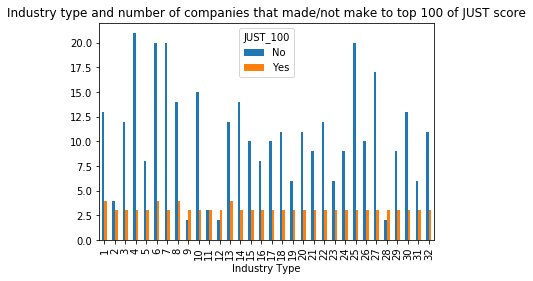

In [43]:
company_scores2=company_scores1.copy()

count_ind_100 = company_scores2.groupby(['JUST_IND','JUST_100']).size()

#print(count_ind_100)

plt.figure(figsize=(15,15))

count_ind_100.unstack().plot(kind='bar')

plt.title('Industry type and number of companies that made/not make to top 100 of JUST score')

plt.xlabel('Industry Type')

plt.show();

In [44]:
company_scores_alphaML=company_scores2.copy()

del company_scores_alphaML['id']
del company_scores_alphaML['JUST_100']
del company_scores_alphaML['INVEST.PROFIT']
del company_scores_alphaML['WGT_SCORE']
del company_scores_alphaML['PAY']
del company_scores_alphaML['TREAT']
del company_scores_alphaML['SUPPLY']
del company_scores_alphaML['COMM']
del company_scores_alphaML['JOBS']
del company_scores_alphaML['PROD']
del company_scores_alphaML['CUST']
del company_scores_alphaML['LEAD']
del company_scores_alphaML['ENV']
del company_scores_alphaML['INVEST']

benchmarkreturn=np.median(company_scores_alphaML['INVEST.RETURN'])

In [45]:
def alpha_return(company_scores_alphaML):
    if company_scores_alphaML['INVEST.RETURN']>=benchmarkreturn:
        value='1'
    else:
        value='0'
    
    return value

company_scores_alphaML['Alpha'] = company_scores_alphaML.apply(alpha_return,axis=1)


In [46]:
company_scores_alphaML1=company_scores_alphaML.copy()

del company_scores_alphaML1['INVEST.RETURN']

In [47]:
company_scores_alphaML2=company_scores_alphaML1.copy()

X=company_scores_alphaML2.iloc[:,0:30]
y=np.array(company_scores_alphaML2['Alpha'])


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import StratifiedKFold

kf=StratifiedKFold(n_splits=2)
kf.get_n_splits(X,y)

for train_index, test_index in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]


C:\Users\Arun\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,auc
from sklearn.feature_selection import RFE

clf_logit=LogisticRegression()

rfe = RFE(clf_logit, 30)
rfe=rfe.fit(X_train,y_train)



In [50]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test,rfe.predict(X_test)).ravel()


In [51]:
print(tn, fp, fn, tp)

(35, 75, 33, 77)


In [52]:
#print(rfe.support_)
#print(rfe.ranking_)

In [53]:
import statsmodels.api as sm
logit_model=sm.Logit(y.astype(float),X.astype(float))
result=logit_model.fit()
print(result.summary())


C:\Users\Arun\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.654173
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  440
Model:                          Logit   Df Residuals:                      410
Method:                           MLE   Df Model:                           29
Date:                Fri, 02 Feb 2018   Pseudo R-squ.:                 0.05623
Time:                        15:23:42   Log-Likelihood:                -287.84
converged:                       True   LL-Null:                       -304.98
                                        LLR p-value:                    0.2286
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
JUST_IND            0.0086      0.011      0.792      0.429      -0.013       0.030
PAY.LIVING    

In [54]:
from sklearn.ensemble import RandomForestClassifier

clf_rf=RandomForestClassifier(criterion='gini',n_jobs=-1,random_state=0,n_estimators=39,
                              min_samples_leaf=1,max_features=19
                              ,max_depth=10,min_samples_split=2,
                             min_weight_fraction_leaf=0,max_leaf_nodes=None,min_impurity_decrease=0,
                             oob_score=True,warm_start=True)

clf_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=19, max_leaf_nodes=None,
            min_impurity_decrease=0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0, n_estimators=39, n_jobs=-1,
            oob_score=True, random_state=0, verbose=0, warm_start=True)

In [55]:
tn, fp, fn, tp = confusion_matrix(y_test,clf_rf.predict(X_test)).ravel()

print(tn, fp, fn, tp)

(6, 104, 3, 107)


In [56]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb=GradientBoostingClassifier(loss='deviance', learning_rate=0.4, n_estimators=71, subsample=1.0, criterion='friedman_mse', 
                              min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, 
                              min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=0, 
                              verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto')


clf_gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.4, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=71,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [57]:
tn, fp, fn, tp = confusion_matrix(y_test,clf_gb.predict(X_test)).ravel()

print(tn, fp, fn, tp)

(22, 88, 12, 98)
